In [1]:
% matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

In [2]:
j = complex(0,1)

In [3]:
def cft(g, k1, k2):
    """Numerically evaluate the Fourier Transform of g for the given frequencies"""    
    result = np.zeros((len(k1), len(k2)), dtype=complex)
    
    # Loop over all frequencies and calculate integral value
    for i, kk1 in enumerate(k1):
        for l, kk2 in enumerate(k2):
            # Evaluate the Fourier Integral for a single frequency ff, 
            # assuming the function is time-limited to abs(t)<5
            result[i][l] = complex_quadrature(lambda x, y: g(x, y)*np.exp(-j*kk1*x)*np.exp(-j*kk2*y), -xmax, xmax, -ymax, ymax)
    return (1/(2*np.pi))*result

def complex_quadrature(func, x1, x2, y1, y2, **kwargs):
    def real_func(x,y):
        return sp.real(func(x,y))
    def imag_func(x,y):
        return sp.imag(func(x,y))
    real_integral = integrate.dblquad(real_func, x1, x2, lambda x: y1, lambda x: y2)
    imag_integral = integrate.dblquad(imag_func, x1, x2, lambda x: y1, lambda x: y2)
    return (real_integral[0] + 1j*imag_integral[0])
    

In [4]:
def one(x,y):
    return 1.0

In [5]:
g = lambda x, y: np.exp(-(x)**2-(y)**2)
xmax = 4
dx = 0.3
x=np.arange(-xmax,xmax,dx)
ymax = 4
dy = 0.3
y=np.arange(-ymax,ymax,dy)

<IPython.core.display.Javascript object>


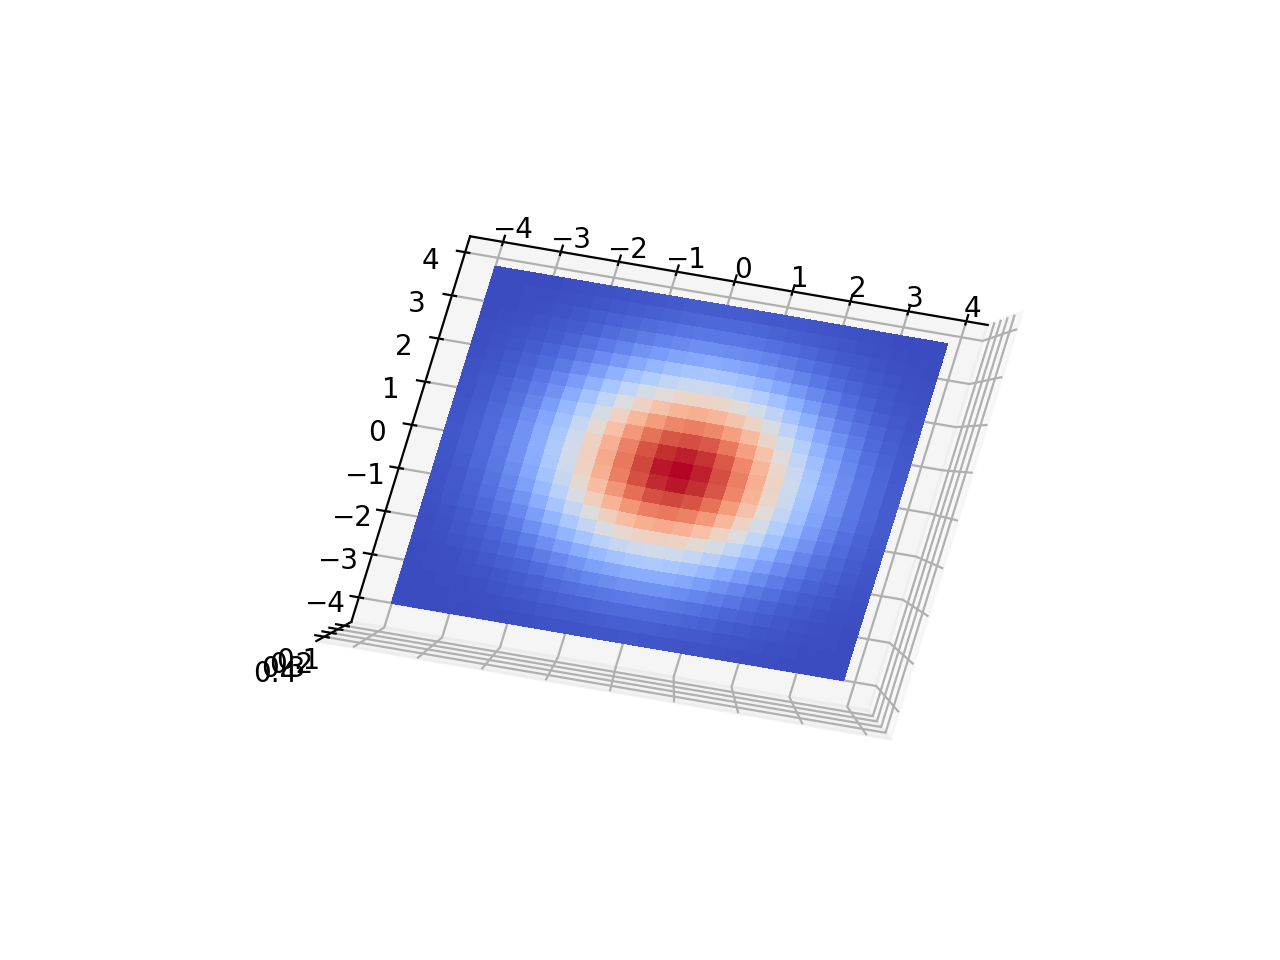

In [6]:
four= cft(g,x,y)
fig = plt.figure()
X, Y = np.meshgrid(x,y)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, np.abs(four) , cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

<IPython.core.display.Javascript object>


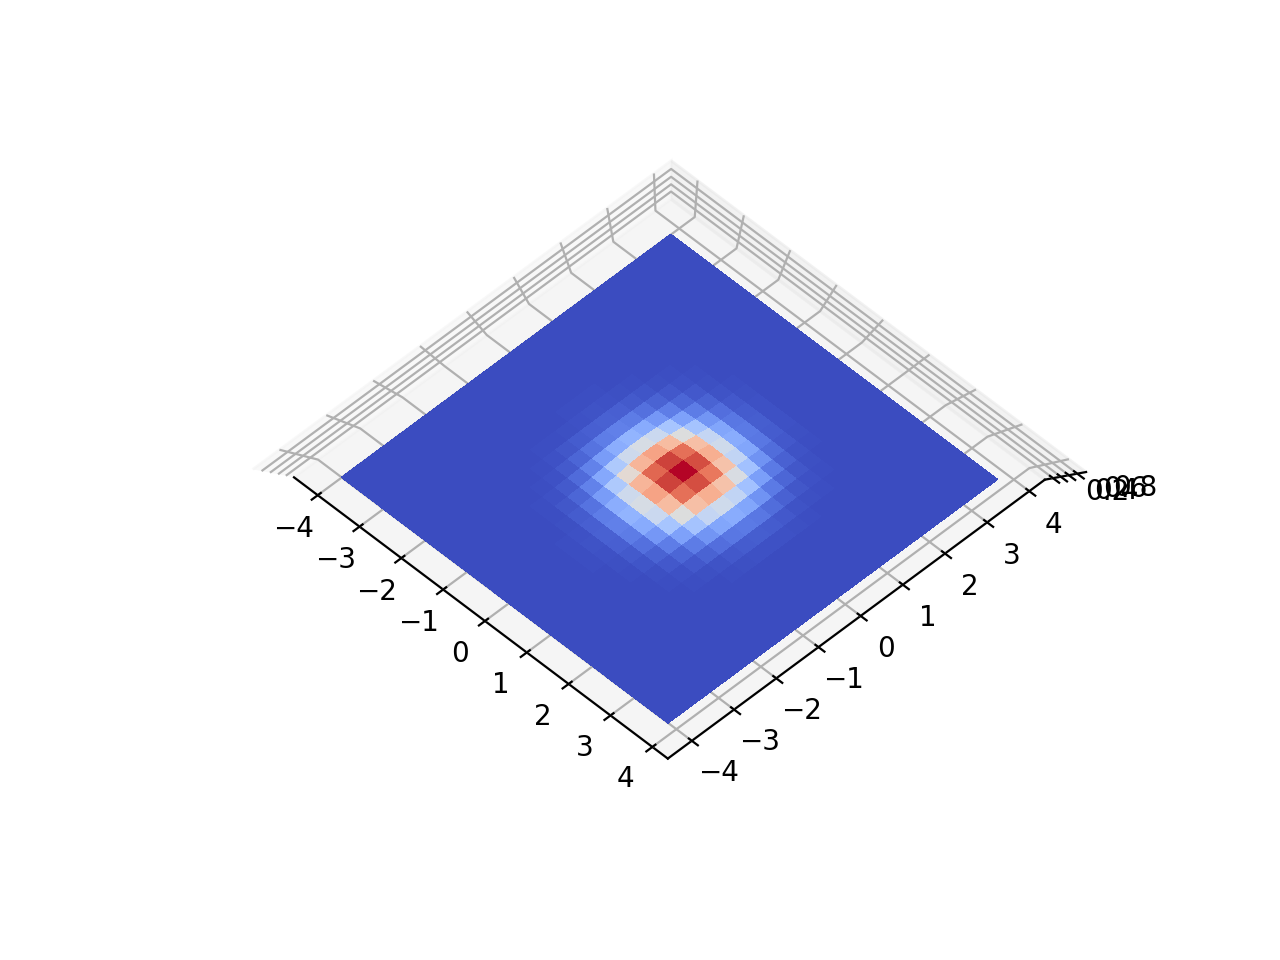

In [7]:

fig = plt.figure()
X, Y = np.meshgrid(x,y)
nonfour= g(X,Y)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, np.abs(nonfour) , cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [8]:
t1 = np.linspace(-2, 2, 1000) 
t2 = np.linspace(-2, 2, 1000) 
dt = t2[1]-t2[0]

dt

ans = 0
for tt1 in t1:
    for tt2 in t2:
        ans += one(tt1,tt2)*dt*dt
        
print(ans)

16.0320480642


In [9]:
complex_quadrature(one, -2, 2, -2, 2)

(16+0j)